# Lab 2

## 1. Load the fetch_20newsgroups dataset and split it into training and test subsets.

In [2]:
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset ='test')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 2. Text preprocessing

In [3]:
def preprocess_texts(texts : list[str]) -> list[str]:
    '''
    Remove all stopwords, remove non-letter words, lowercase.
    '''
    filtered = []
    for text in texts:
        temp = []
        for word in nltk.tokenize.word_tokenize(text):
            if word.lower() not in stopwords.words('english') and word.isalpha():
                temp.append(word.lower())

        filtered.append(" ".join(temp))
    return filtered

def stem_texts(texts : list[str]):
    '''
    Stem all words in texts.\n\nAccepts already tokenized texts.
    '''
    stemmed = []
    stemmer = nltk.SnowballStemmer("english")

    for text in texts:
        temp = []
        for word in nltk.tokenize.word_tokenize(text):
            temp.append(stemmer.stem(word))

        stemmed.append(" ".join(temp))
    return stemmed


newsgroups_train['preprocessed_data'] = preprocess_texts(newsgroups_train.data)
newsgroups_test['preprocessed_data'] = preprocess_texts(newsgroups_test.data)

newsgroups_train['stemmed_data'] = stem_texts(newsgroups_train['preprocessed_data'])
newsgroups_test['stemmed_data'] = stem_texts(newsgroups_test['preprocessed_data'])

## 3. Vectorizers


In [4]:
def vectorize_data(vectorizer, train_data, test_data):
    '''
    Fits vectorizer and vectorizes data.

    Returns: Vectorized train data, vectorized test data.
    '''
    vec_train = vectorizer.fit_transform(train_data)
    vec_test = vectorizer.transform(test_data)
    return vec_train, vec_test


'''
Count Vectorizer
'''

# raw texts
raw_text_count_train, raw_text_count_test = vectorize_data(
    CountVectorizer(),
    newsgroups_train.data,
    newsgroups_test.data)

# preprocessed texts excluding stemming
preprocessed_count_train, preprocessed_count_test = vectorize_data(
    CountVectorizer(),
    newsgroups_train['preprocessed_data'],
    newsgroups_test['preprocessed_data'])

# preprocessed texts including stemming
stemmed_count_train, stemmed_count_test = vectorize_data(
    CountVectorizer(),
    newsgroups_train['stemmed_data'],
    newsgroups_test['stemmed_data'])

# preprocessed texts considering bigrams as well
stemmed_bigram_count_train, stemmed_bigram_count_test = vectorize_data(
    CountVectorizer(ngram_range=(1,2)),
    newsgroups_train['stemmed_data'],
    newsgroups_test['stemmed_data'])

'''
Tf-idf Vectorizer
'''

# raw texts
raw_text_tfidf_train, raw_text_tfidf_test = vectorize_data(
    TfidfVectorizer(),
    newsgroups_train.data,
    newsgroups_test.data)

# preprocessed texts excluding stemming
preprocessed_tfidf_train, preprocessed_tfidf_test = vectorize_data(
    TfidfVectorizer(),
    newsgroups_train['preprocessed_data'],
    newsgroups_test['preprocessed_data'])

# preprocessed texts including stemming
stemmed_tfidf_train, stemmed_tfidf_test = vectorize_data(
    TfidfVectorizer(),
    newsgroups_train['stemmed_data'],
    newsgroups_test['stemmed_data'])

# preprocessed texts considering bigrams as well
stemmed_bigram_tfidf_train, stemmed_bigram_tfidf_test = vectorize_data(
    TfidfVectorizer(ngram_range=(1,2)),
    newsgroups_train['stemmed_data'],
    newsgroups_test['stemmed_data'])

## 4. Questions

### How many instances do training and test subsets of the fetch_20newsgroups dataset contain separately?

In [42]:
print("The training subset has ", len(newsgroups_train.data), " instances.")
print("The test subset has ", len(newsgroups_test.data), " instances.")

The training subset has  11314  instances.
The test subset has  7532  instances.


### How many classes are there for the articles in the dataset, and what are the names of these classes?

In [43]:
print("There are ", len(newsgroups_test.target_names), " different classes.")

for name in newsgroups_test.target_names:
    print(name)

There are  20  different classes.
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


### How does the dimension of the CountVector vary based on different preprocessing approaches?


In [44]:
print("Dimension of count vector for raw text: ", raw_text_count_train.shape[1])
print("Dimension of count vector for preprocessed data: ", preprocessed_count_train.shape[1])
print("Dimension of count vector for stemmed data: ", stemmed_count_train.shape[1])
print("Dimension of count vector for stemmed data considering bigrams: ", stemmed_bigram_count_train.shape[1])

Dimension of count vector for raw text:  130107
Dimension of count vector for preprocessed data:  73078
Dimension of count vector for stemmed data:  54944
Dimension of count vector for stemmed data considering bigrams:  867347


The more preprocessed the text is, the less distinct tokens are there, the smaller the dimention of the vectors.

When considering bigrams, dimentionality goes up because of the number of combinations.

## 5. Classify the texts

In [5]:
def get_predictions_of_model_on_data(model_class, train_data, test_data, train_target):
    '''
    Fit a model with vectorized data and get predictions.
    '''
    model = model_class.fit(train_data, train_target)
    return model.predict(test_data)

Train each model on each type of preprocessing and vectorizer, let the model classify the test data and save the predictions in a `results_dict`

In [ ]:
results_dict = {}
for classifier, name in [(MultinomialNB(), "Naive Bayes"), (SVC(), "SVC"), (LogisticRegression(), "Regression"), (RandomForestClassifier(), "Random Forest")]:
    print("Training", name)
    temp = {}

    # raw texts
    temp["raw texts count"] = get_predictions_of_model_on_data(classifier,
                                                 raw_text_count_train,
                                                 raw_text_count_test,
                                                 newsgroups_train.target)

    temp["raw texts tfidf"] = get_predictions_of_model_on_data(classifier,
                                                 raw_text_tfidf_train,
                                                 raw_text_tfidf_test,
                                                 newsgroups_train.target)

    # preprocessed texts excluding stemming
    temp["preprocessed texts count"] = get_predictions_of_model_on_data(classifier,
                                                 preprocessed_count_train,
                                                 preprocessed_count_test,
                                                 newsgroups_train.target)

    temp["preprocessed texts tfidf"] = get_predictions_of_model_on_data(classifier,
                                                 preprocessed_tfidf_train,
                                                 preprocessed_tfidf_test,
                                                 newsgroups_train.target)

    # preprocessed texts including stemming
    temp["stemmed texts count"] = get_predictions_of_model_on_data(classifier,
                                                 stemmed_count_train,
                                                 stemmed_count_test,
                                                 newsgroups_train.target)

    temp["stemmed texts tfidf"] = get_predictions_of_model_on_data(classifier,
                                                 stemmed_tfidf_train,
                                                 stemmed_tfidf_test,
                                                 newsgroups_train.target)

    # preprocessed texts considering bigrams as well
    temp["stemmed bigram texts count"] = get_predictions_of_model_on_data(classifier,
                                                 stemmed_bigram_count_train,
                                                 stemmed_bigram_count_test,
                                                 newsgroups_train.target)

    temp["stemmed bigram texts tfidf"] = get_predictions_of_model_on_data(classifier,
                                                 stemmed_bigram_tfidf_train,
                                                 stemmed_bigram_tfidf_test,
                                                 newsgroups_train.target)

    results_dict[name] = temp

## 6. Evaluate using multiple metrics

In [46]:
for method in results_dict:
    print(method)
    print("\naccuracy:")
    for preprocessing in results_dict[method]:
        print(preprocessing, accuracy_score(newsgroups_test.target, results_dict[method][preprocessing]))

    print("\nf1_score:")
    for preprocessing in results_dict[method]:
        print(preprocessing, f1_score(newsgroups_test.target, results_dict[method][preprocessing], average="weighted"))

    print("\nprecision:")
    for preprocessing in results_dict[method]:
        print(preprocessing, precision_score(newsgroups_test.target, results_dict[method][preprocessing], average="weighted"))

    print("\nrecall:")
    for preprocessing in results_dict[method]:
        print(preprocessing, recall_score(newsgroups_test.target, results_dict[method][preprocessing], average="weighted"))

Naive Bayes

accuracy:
raw texts count 0.7728359001593202
raw texts tfidf 0.7738980350504514
preprocessed texts count 0.8147902283590016
preprocessed texts tfidf 0.8090812533191716
stemmed texts count 0.8035050451407328
stemmed texts tfidf 0.8036378120021243
stemmed bigram texts count 0.8098778544875199
stemmed bigram texts tfidf 0.8169144981412639

f1_score:
raw texts count 0.7511127577441177
raw texts tfidf 0.7684457156894653
preprocessed texts count 0.8091838550449055
preprocessed texts tfidf 0.8019006806034267
stemmed texts count 0.7952600019609147
stemmed texts tfidf 0.7956027121157477
stemmed bigram texts count 0.8047717132078135
stemmed bigram texts tfidf 0.8104140121558414

precision:
raw texts count 0.7616683207318354
raw texts tfidf 0.8218781741893993
preprocessed texts count 0.8267221353663584
preprocessed texts tfidf 0.8371801820381521
stemmed texts count 0.8180376442726979
stemmed texts tfidf 0.8342875141222853
stemmed bigram texts count 0.8259120635209778
stemmed bigram t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


stemmed texts tfidf 0.8270476956033173
stemmed bigram texts count 0.8101888218083144
stemmed bigram texts tfidf 0.8352319135628984

recall:
raw texts count 0.7892989909718534
raw texts tfidf 0.8274030801911842
preprocessed texts count 0.7882368560807222
preprocessed texts tfidf 0.8266064790228359
stemmed texts count 0.7859798194370685
stemmed texts tfidf 0.8238183749336165
stemmed bigram texts count 0.8060276155071694
stemmed bigram texts tfidf 0.828996282527881
Random Forest

accuracy:
raw texts count 0.7634094530005311
raw texts tfidf 0.7632766861391397
preprocessed texts count 0.7646043547530537
preprocessed texts tfidf 0.7558417419012214
stemmed texts count 0.7579660116834838
stemmed texts tfidf 0.7590281465746149
stemmed bigram texts count 0.7738980350504514
stemmed bigram texts tfidf 0.7708443972384493

f1_score:
raw texts count 0.7580805859262573
raw texts tfidf 0.7574100609173702
preprocessed texts count 0.7608021068324565
preprocessed texts tfidf 0.7508867634523942
stemmed tex

## 7. Questions

### Which preprocessing approach and vector representation combination yields the best results in terms of classification accuracy?

The best result I got, after training all the selected models with both vector representations on different kinds of preprocessing is **0.828996282527881** in terms of accuracy.

I achieved it with **Logistic Regression trained on preprocessed texts including stemming, using tf-idf vectorizer that considers both bigrams and unigrams**

## 8. Calculate the F1-score using different values of the 'average' and 'labels'

In [6]:
best_model_predictions = get_predictions_of_model_on_data(LogisticRegression(),
                                          stemmed_bigram_tfidf_train,
                                          stemmed_bigram_tfidf_test,
                                          newsgroups_train.target)

In [ ]:
print("accuracy of the model:", accuracy_score(newsgroups_test.target, best_model_predictions))

print("average='micro', labels='None':", f1_score(newsgroups_test.target, best_model_predictions, average='micro', labels='None'))
print("average='micro':", f1_score(newsgroups_test.target, best_model_predictions, average='micro'))

print("average='macro', labels='None':", f1_score(newsgroups_test.target, best_model_predictions, average='macro', labels='None'))
print("average='macro':", f1_score(newsgroups_test.target, best_model_predictions, average='macro'))

print("average='weighted', labels='None':", f1_score(newsgroups_test.target, best_model_predictions, average='weighted', labels='None'))
print("average='weighted':", f1_score(newsgroups_test.target, best_model_predictions, average='weighted'))

print("average='weighted', labels=[1,2,3,4,5]:", f1_score(newsgroups_test.target, best_model_predictions, average='weighted', labels=[1,2,3,4,5]))

accuracy of the model: 0.828996282527881

average='micro', labels='None': 0.7249999999999999

average='micro': 0.828996282527881

average='macro', labels='None': 0.5438401661406774

average='macro': 0.820492544745689

average='weighted', labels='None': 0.7253317849988162

average='weighted': 0.8273396758486636

average='weighted', labels=[1,2,3,4,5]: 0.7579099812567712

## 9. Generate a confusion matrix

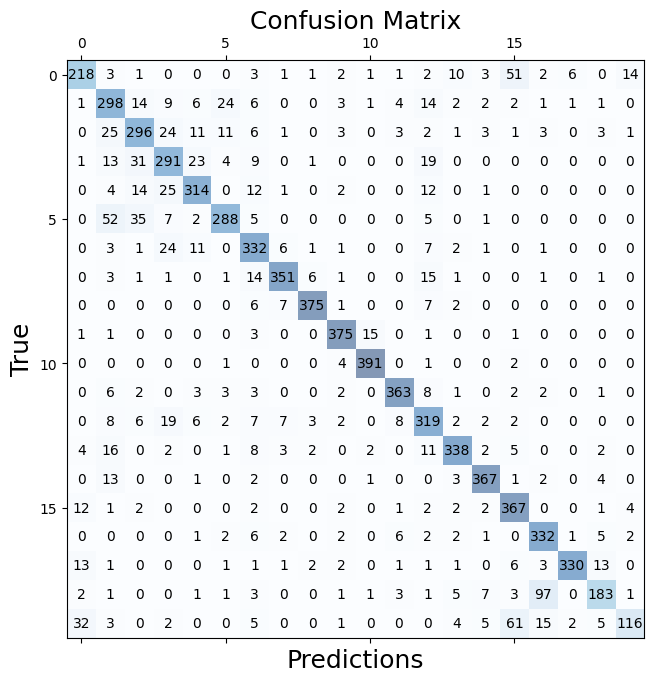

In [22]:
conf_matrix = confusion_matrix(newsgroups_test.target, best_model_predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 10. Questions

### What do micro, macro, or weighted values of the 'average' parameter of the F1-score allow you to set?

How the average is computed.
- Micro
  - Calculate metrics globally by counting the total true positives, false negatives and false positives.
- Macro
  - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- weighted
  - Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

### What are the classes where the classification model tends to perform poorly or make the most mistakes?


As we can see from the confusion matrix, class `18` (`talk.politics.misc`) is being often classified as class `16` (`talk.politics.guns`), with 97 instances of class `18` (`talk.politics.misc`) ending up with the label `16` (`talk.politics.guns`).

Another problematic class is class `19` (`talk.religion.misc`), which is being classified as `15` (`soc.religion.christian`) with 61 mislabeled instances and as `0` (`alt.atheism`) with 32 mislabeled instances.

There is also quite a big confusion between classes `1` to `5`, being the topics of `comp.graphics`, `comp.os.ms-windows.misc`, `comp.sys.ibm.pc.hardware`, `comp.sys.mac.hardware` and `comp.windows.x`.